# Predicting Breast Cancer Using LogisticRegression

In [ ]:
!pip install ipykernel

In [1]:
#Importing 
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

## Reading the dataset

In [2]:
#Reading dataset
df = pd.read_csv('data.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
print(df.shape)

(569, 33)


### Columns/Variables in the dataset

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

The above dataset has 33 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### The column 32(Unnamed:32) has all NULL values and can be removed

In [6]:
df.rename({"Unnamed: 32":"a"}, axis="columns", inplace=True)
df.drop(["a"], axis=1, inplace=True)
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


### Target variable diagnosis is a categorial variable M: Malignant, B: Benign. It is changed to M:1, B:0

In [7]:
df['diagnosis'] = df['diagnosis'].apply(lambda x : '1' if x == 'M' else '0')
df = df.set_index('id')
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


After removing Unnamed:32 column and makind id column as an index label the dataset has 31 columns/variables(including target variable)

In [8]:
print(len(df.columns))

31


## Number of benign and malignant observations

Number of Benign patients 357
Number of Malignant patients 212


<Axes: xlabel='count', ylabel='diagnosis'>

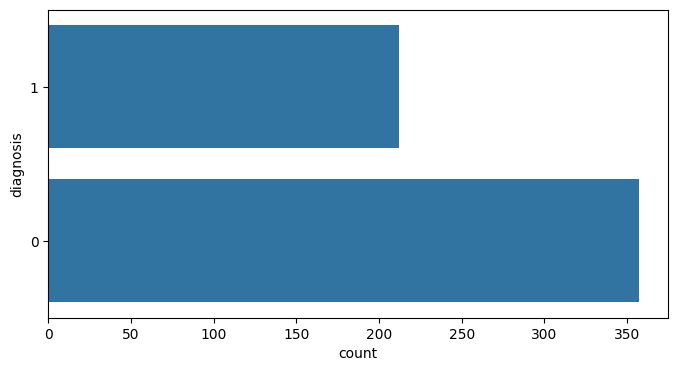

In [9]:
# Number of Benign and Malignant observations
benign,malignant = df['diagnosis'].value_counts()
print("Number of Benign patients", benign)
print("Number of Malignant patients", malignant)

plt.figure(figsize = (8,4))
sns.countplot(df['diagnosis'])

In [10]:
y = df['diagnosis'].values # Target variable
X = df.drop('diagnosis', axis =1).values # Feature variables

## Spliting data into train and test sets

In [11]:
#splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


## Data Normalization/ Feature Scaling

In [12]:
# Normalization
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)
print(X_train_sc)

[[-1.34450029  0.5346355  -1.32325205 ... -1.34334388 -0.84057964
   0.48739774]
 [ 3.77500369  1.58209417  3.89649166 ...  2.25906721 -0.39639035
  -0.51916346]
 [-0.12789731 -0.68625859 -0.17338951 ... -0.40950938 -0.11981967
  -0.31830386]
 ...
 [-0.8067862  -1.4370514  -0.81092486 ... -0.40251322 -0.24218124
  -0.18251146]
 [-0.92324831 -0.84828378 -0.88563924 ... -0.52175203 -0.49696151
   1.38928563]
 [-0.44603771 -0.06097825 -0.41313236 ... -0.32418671 -1.26800706
  -0.65439007]]


## Buiding Logistic Regression

In [13]:
# fitting model
model = LogisticRegression(C = 0.3)
model.fit(X_train_sc, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.3
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [14]:
X_test_sc[0]

array([-0.96666522,  0.32786912, -0.93579507, -0.91104225,  0.60962671,
        0.36569592, -0.10914833, -0.62181482, -0.63860111,  0.53651178,
       -0.46379509,  0.5132434 , -0.45632075, -0.59189989,  0.67370318,
        1.26928541,  2.17185315,  1.12535098,  0.64821758,  1.09244461,
       -0.96440581, -0.08750638, -0.94145109, -0.84547739, -0.07511418,
       -0.01862761, -0.10400188, -0.47718048, -0.5634723 ,  0.05526303])

## Predicting

In [15]:
# predicting
y_pred_lr = model.predict(X_test_sc)
accuracy_lr = accuracy_score(y_test,y_pred_lr)
print("Accuracy on Test Data:",accuracy_lr)

Accuracy on Test Data: 0.9824561403508771


## Confusion matrix

In [16]:
confusion_matrix(y_test,y_pred_lr)
lr_cm = confusion_matrix(y_test, y_pred_lr)
lr_cm = pd.DataFrame(lr_cm, columns=['Benign', 'Malignant'], index=['Benign','Malignant'])
lr_cm

,Benign,Malignant
Benign,66,0
Malignant,2,46


## Classification report

In [17]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        66
           1       1.00      0.96      0.98        48

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [18]:
import pickle
with open('./model.pkl', 'wb') as model_pkl:
    pickle.dump(model, model_pkl)